---
<a name='title'></a>
# **<font color="Navy"> Modelación Climática </font>**
## **<font color="RoyalBlue"> Tema 1 Modelo 0 dimensional </font>**
### **<font color="DodgerBlue"> Notebook 2: El modelo de orden cero </font>**
### Escuela Nacional de Ciencias de la Tierra
#### Semestre 2024-II

---

El modelo de orden cero es la base de la modelación climática porque nos ayuda a entender la relación entre la radiación y la temperatura superficial de un planeta. 

Su formulación simple y sus diferentes variantes nos permiten comprender conceptos como el efecto invernadero y también el rol que tiene las características internas y astronómicas de un planeta. 

---
<a name='title'></a>
## **<font color="RoyalBlue"> Modelo orden cero </font>**

---

El modelo 0 dimensional se obtiene de resolver un balance energético para un punto a una distancia $d$ de una estrella. Este balance está dado por dos términos principales, la energía incidente y la energía saliente. La primera está dada por el flujo radiativo total del Sol, la distancia $d$, y el albedo planetario. 

La energía incidente depende de la luminosidad solar y del radio del planeta. La energía saliente es el flujo de radiación obtenido de la ley de Steffan Boltzmann multiplicado por En particular, encontramos las expresiones: 

\begin{align}
Ei=S_0\,A_{TD}(1-\alpha)=S_0 \pi R_T^2(1-\alpha) 
\end{align}

donde $A_{TD}$ es el área del disco o sombra que recibe la radiación solar en la Tierra. Esta ecuación nos dice la energía total (en W) que es absorbida por la Tierra proveniente del Sol. $S_0$ es la constante solar y que se puede calcular a partir de la luminosidad solar ($L$) y la distancia entre la Tierra y el Sol ($d$):

\begin{align}
S_0 = \frac{L}{4\pi d^2}
\end{align}

y típicamente se dice que vale 1368 W m$^{-2}$, para una luminosidad solar de 3.846$\times$10$^{26}$ W veamos cuánto nos sale si utilizamos el valor de distancia promedio entre la Tierra y el Sol como 1.49 $\times$10$^{11}$ m.

Primero vamos a crear nuestra función para calcular la radiación incidente por unidad de área, o constante solar.

In [43]:
import numpy as np
import matplotlib.pyplot as plt

In [44]:
# funcion para calcular la constante solar
def solar_flux(d,L=3.846e26):
    # L es considerada constante
    S0=L/(4*np.pi*(d**2))
    return S0
# evaluamos la funcion para la distancia promedio
d_promedio=1.49e11
S0=solar_flux(d_promedio)
print(S0)

1378.5638285019356


Ahora podemos calcular la energía incidente total utilizando la función anterior:

In [45]:
def Energia_incidente(d,alpha=0.3):
    radioT=6.371e6
    S0=solar_flux(d)
    Rst=S0*np.pi*(radioT**2)
    return Rst*(1-alpha)
print(Energia_incidente(d_promedio))

1.2305237545628574e+17


Podemos ahora comparar este valor de energía saliente con el de la energía incidente. 
La energía saliente, depende de la ley de Steffan Boltzmann por lo que podemos utilizar esta función definida en el notebook anterior para calcular esta energía saliente. 

In [46]:
# reutilizamos nuestra funcion de Stefan Boltzman
def StefanB(T):
    sigma=5.67037e-8
    return sigma*(T**4)
def Energia_saliente(T):
    energia=StefanB(T)
    radioT=6.371e6
    Area=(4)*np.pi*(radioT**2)
    return energia*Area
# calculemos la energía saliente para una temperatura promedio es de 12 C.
R_saliente=Energia_saliente(285)
print(R_saliente)

1.9081649417208467e+17


¿Por qué nos salen valores diferentes de energía saliente y energía incidente. 

Podemos ahora finalmente unir todo esto con la expresión que calculamos en clase para la temperatura de equilibrio. 

\begin{align}
T_e=\sqrt[4]  \frac{S_0(1-\alpha)}{4\sigma}
\end{align}

Esta función nos permitirá obtener un valor de la temperatura de equilibrio para cualquier par de $S_0$ y $\alpha$. 

Potencialmente podríamos utilizar esta función para otros planetas.

In [47]:
def Te(S0,alpha):
    sigma=5.67e-8
    numerador=S0*(1-alpha)
    denominador=4*sigma
    fraccion=numerador/denominador
    T=(fraccion)**(1/4)
    return T
# evaluamos funcion para el valor tipico de albedo
alpha=0.3
Te(S0,alpha)

255.39974964549035

---
<a name='ej-1'></a>
### **<font color="DodgerBlue">Ejercicio 5 - Albedo </font>**

<font color="DarkBlue"> Haga una gráfica de línea de la temperatura de equilibrio como función del albedo planetario. Para esto, genere un arreglo considerando todos los valores posibles del albedo. 

---


## **<font color="RoyalBlue"> Modelo con efecto invernadero </font>**


### Sabor 1

En nuestro modelo original con una sola capa de la atmósfera obtuvimos que la temperatura de equilibrio se puede escribir como:

\begin{align}
T_e=\sqrt[4]  \frac{S_0(1-\alpha)}{4\sigma}
\end{align}

mientras que la temperatura superficial se obtuvo como: 

\begin{align}
T_s=\sqrt[4]{2} T_e
\end{align}

Podemos también demostrar, con los ejemplos de 2 o tres capas y que la temperatura superficial sigue siendo proporcional a la temperatura de equilibrio, donde la constante de proporcionalidad está dada por el número de capas. De hecho, se puede escribir como:

\begin{align}
T_s=\sqrt[4]{n+1}  T_e
\end{align}

Para empezar, vamos a escribir estas funciones pero además calculando el término de la energía incidente por separado, para esto escribimos que la radiación incidente en el tope de la atmósfera es $S_{abs}$, (esto es sólo un cambio de variable):

\begin{align}
Sabs=\frac{S_0(1-\alpha)}{4}
\end{align}

El siguiente código traduce las ecuaciones anteriores a Python.

In [48]:
def S_abs(S0,alpha):
    return S0*(1-alpha)/4.
def Te(S0,alpha):
    Sabs=S_abs(S0,alpha)
    sigma=5.67e-8
    return (Sabs/sigma)**(1/4)

def Ts(alpha,S0,n=1):
    TE=Te(S0,alpha)
    Ts=(n)**(1/4)*TE
    return Ts

### Graficando los primeros resultados de este modelo

Para graficar, seguramente usted como yo extrañará nuestra función `lineplot_setup`. 
Aunque le pusimos el nombre de gráfico de línea, en realidad nos sirve para graficar varias cosas, como un gráfico de dispersión. En estricto sentido, esta función sólo modifica a un objeto figura cualquier, que podría venir de un gráfico de dispersión o uno de línea.

In [49]:
def lineplot_setup(xmin,xmax,xlab,ylab,ymin=None,ymax=None,title=None):
    # especificar limites minimos y maximos del grafico
    plt.xlim([xmin,xmax])
    plt.ylim([ymin,ymax])
    # cuadrilla interna del grafico
    plt.grid(linestyle='--',alpha=0.66)
    plt.minorticks_on()
    # hacer las etiquetas de ambos ejes mas grandes
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlabel(xlab,fontsize=14)
    plt.ylabel(ylab,fontsize=14)
    plt.title(title,fontsize=15)

### Sensibilidad al número de capas

Si ahora queremos graficar la sensibilidad de nuestro modelo al número de capas, podemos hacer un gráfico de dispersión para $T_s(n)$ para diferentes valores de $n$. Para esto podemos usar un ciclo loop que itere por valores de $n$ sensatos como del 1 al 8. 

En este caso usamos la función de Python `plt.scatter`. Una manera de averiguar a graficar cosas nuevas o a utilizar funciones nuevas es la documentación https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html



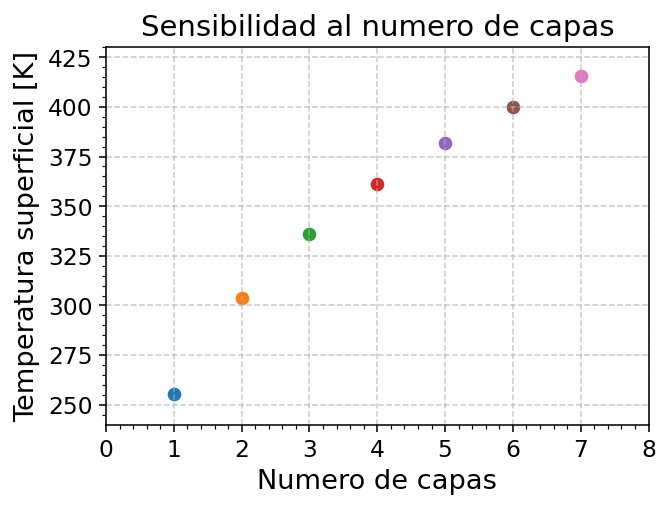

In [50]:
plt.figure(figsize=(5,3.5),dpi=140)
for ni in range(1,8):
    plt.scatter(ni,Ts(alpha,S0,n=ni))
lineplot_setup(0,8,xlab='Numero de capas',ylab='Temperatura superficial [K]',
               ymin=240,ymax=430,title='Sensibilidad al numero de capas')

## **<font color="RoyalBlue"> La gráfica anterior está mal, ¿por qué? </font>**

### Sabor 2

En un segundo ejercicio, podemos considerar el caso donde la atmósfera de 1 capa no absorbe toda la radiación saliente al espacio. Ya vimos que esto genera una temperatura mucho mayor que la que observamos. Entonces podemos parametrizar o discretizar esta absorción de radiación saliente de onda larga a través del parámetro $f$ que nos dice, del 0 al 1, *qué fracción de la radiación terrestre es absorbida por la atmósfera*. 

Utilizando este modelo, llegamos a las siguientes ecuaciones:

\begin{align}
S_abs + \sigma T_A^4=\sigma T_s^4
\end{align}

y 

\begin{align}
f\, \sigma T_s^4=2\sigma T_A^4
\end{align}

podemos resolver para la temperatura superficial y encontramos que:

\begin{align}
T_s=\sqrt[4]\frac{2\,Sabs}{\sigma(2-f)}
\end{align}

y vemos que la $T_s$ en este modelo se puede escribir únicamente como función de los parámetros de albedo ($\alpha$), la constante solar ($S_0$) y el efecto invernadero ($f$).  

Ahora vamos a jugar con esto.

Primero escribimos la función:

In [51]:
def Ts_ef(alpha,S0,f=1):
    # funcion de temperatura superficial para el efecto invernadero variable
    sigma=5.67e-8
    sabs=S_abs(S0,alpha)
    Ts=((2*sabs)/(sigma*(2-f)))**(1/4)
    return Ts

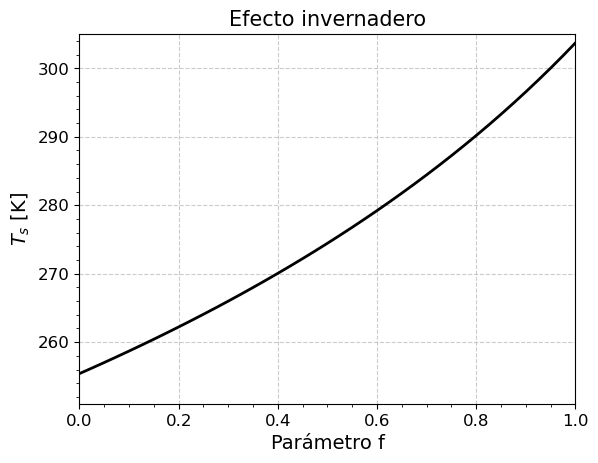

In [52]:
# hacemos un vector de todos los valores posibles de f
f=np.arange(0,1.01,0.025)
plt.plot(f,Ts_ef(alpha,S0,f),c='k',linewidth=2)
lineplot_setup(0,1,xlab='Parámetro f',ylab='$T_s$ [K]',
               ymin=251,ymax=305,title='Efecto invernadero')

Ya hemos calculado la temperatura superficial como función del albedo y como función del parámetro de efecto invernadero. Pero ahora podemos mostrar la dependencia a ambos parámetros dentro de un sólo arreglo. En este caso, vamos a pasar del mundo unidimensional (1D) al mundo bidimensional. 

Específicamente, queremos resolver la temperatura superficial como función de $\alpha$ y $f$: 

\begin{align}
T_s(\alpha,f)=\sqrt[4]\frac{2\,Sabs(\alpha)}{\sigma(2-f)}
\end{align}

Para poder guardar estos resultados, vamos a utilizar otra función de *NumPy*, que se llama `np.zeros` y es una función que se utiliza para crear matrices de ceros. En el contexto de una dimensión, al llamar a np.zeros(n), se genera un arreglo unidimensional de longitud $n$ lleno de ceros. Esto es útil para inicializar vectores o arreglos cuando se trabaja en cómputo científico, proporcionando una estructura de datos eficiente y rápida.




In [53]:
np.zeros(5)

array([0., 0., 0., 0., 0.])

La celda anterior fue capaz de crear un arreglo de 1D de longitud 5 cuyos valores son todos 0. 

Cuando se extiende a más dimensiones, np.zeros puede ser empleado para crear matrices multidimensionales. Por ejemplo, al llamar a np.zeros((m, n)), se genera una matriz bidimensional de dimensiones $m\times n$, completamente compuesta por ceros. Este enfoque se utiliza comúnmente para inicializar matrices antes de realizar operaciones numéricas o almacenar resultados de cálculos en algoritmos científicos y análisis de datos.

La ventaja de utilizar np.zeros radica en su eficiencia computacional, ya que NumPy está optimizado para operaciones numéricas y se ejecuta de manera más rápida que las listas estándar de Python. Además, en el ámbito científico, donde el rendimiento y la manipulación eficiente de datos son cruciales, la capacidad de inicializar matrices con ceros de manera rápida y sencilla es esencial para el desarrollo de algoritmos y simulaciones.

Veamos un ejemplo:

In [54]:
np.zeros((3,2))

array([[0., 0.],
       [0., 0.],
       [0., 0.]])

En la celda anterior hicimos una matriz de $3\times2$ llena de ceros. Podemos ahora usar esta función para inicializar un arreglo para la temperatura superficial que llamaremos Ts_matrix  y que después, iterativamente, llenaremos valor por valor, evaluando la función que hicimos anteriormente para cada par ($\alpha,f$). 

Por esta razón el siguiente código primero calcula la longitud de los vectores para $\alpha$ y $f$ y de esa dimensión sera nuestra matriz.

In [55]:
# generamos un vector nuevo de albedos, de 0 a 1 separados por valores de 0.02 
alpha=np.arange(0,1.01,0.02)
print(len(alpha),len(f))
# aqui es donde hacemos la matriz que queremos, su longitud y tamaño lo hacemos a la medida de nuestras variables 
# alpha y f. F lo definimos un par de celdas arriba

Ts_matrix=np.zeros((len(alpha),len(f)))
print(Ts_matrix.shape)
print(Ts_matrix[1,2])

51 41
(51, 41)
0.0


Ahora calculamos la temperatura superficial para cada par ($\alpha,f$) y lo guardamos en Ts_matrix. 
Para hacer esto, utilizaremos el truco de `enumerate`. 

`enumerate` en Python es una función incorporada que se utiliza comúnmente en bucles `for` para iterar sobre una secuencia mientras se lleva un conteo del índice o posición de cada elemento. Al usar enumerate junto con un bucle `for`, puedes acceder tanto al valor del elemento como a su índice simultáneamente, lo que resulta conveniente en diversas situaciones.

Por ejemplo:

In [56]:
fruits = ['apple', 'banana', 'orange']
for index, fruit in enumerate(fruits):
    print(f"Index: {index}, Fruit: {fruit}")

Index: 0, Fruit: apple
Index: 1, Fruit: banana
Index: 2, Fruit: orange


In [57]:
# Ahora utilizamos enumerate para iterar sobre alpha y f y analizar sus indices.

for ia,alpha_i in enumerate(alpha):
    for i_f,fi in enumerate(f):
        Ts_matrix[ia,i_f]=Ts_ef(alpha_i,S0,fi)

## Gráficos de contorno

`plt.contourf` es una función de la biblioteca Matplotlib que se utiliza para crear gráficos de contorno rellenos, también conocidos como mapas de calor. Este comando es especialmente útil para visualizar distribuciones de datos bidimensionales y resaltar áreas de concentración o variación. Al emplear `plt.contourf`, se puede especificar un conjunto de datos bidimensional, generalmente representado como una matriz, y la función generará un mapa de contorno coloreado donde los colores indican diferentes niveles de valores en la matriz. Además, es posible personalizar la cantidad de contornos, los colores utilizados y otros aspectos visuales para adaptar el gráfico a las necesidades específicas del análisis. 

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.contourf.html

La palabra `levels` por ejemplo nos permite indicar los niveles específicos del gráfico.

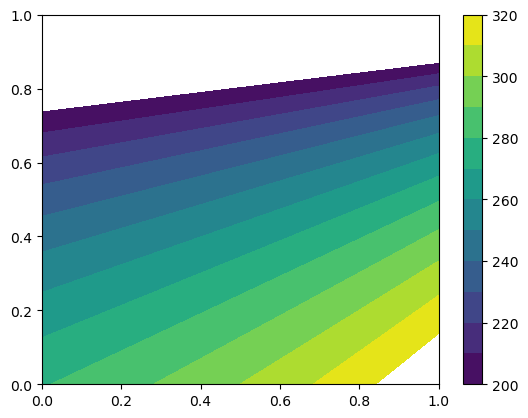

In [58]:
# los colores del map van de 200 K a 330 K en intervalos de 10 K.
plt.contourf(f,alpha,Ts_matrix,levels=np.arange(200,330,10))
# agregamos la barra de colores
plt.colorbar()

1. $\bf{levels:}$
    levels controla la cantidad y los valores de los contornos en el gráfico. Puedes proporcionar una secuencia de valores para especificar niveles específicos o un entero para dividir automáticamente el rango de datos en esa cantidad de niveles.
    
2. $\bf{extend:}$
    El argumento extend permite especificar cómo manejar los valores fuera de los límites del intervalo proporcionado por levels. Puede ser 'neither' (predeterminado), 'both', 'min', o 'max'. Esto es útil cuando quieres resaltar áreas de valores extremos.
    
3. $\bf{cmap:}$
    cmap determina la paleta de colores utilizada para representar los diferentes niveles de datos. Matplotlib ofrece una variedad de mapas de colores incorporados, y también es posible utilizar mapas de colores personalizados.
    https://matplotlib.org/stable/users/explain/colors/colormaps.html
    
Para ver más argumentos de contourf, ver: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.contourf.html

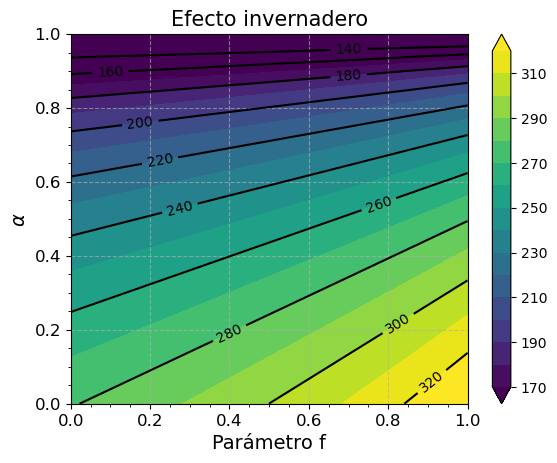

In [59]:
# mejoramos la grafica con extend 
plt.contourf(f,alpha,Ts_matrix,levels=np.arange(170,330,10),cmap='viridis',extend='both')
plt.colorbar()
cc=plt.contour(f,alpha,Ts_matrix,levels=np.arange(140,330,20),colors='k')
plt.clabel(cc)
lineplot_setup(0,1,xlab='Parámetro f',ylab=r'$\alpha$ ',
               ymin=0,ymax=1,title='Efecto invernadero')

---
<a name='ej-1'></a>
### **<font color="DodgerBlue">Ejercicio 6 - Contourf </font>**

<font color="DarkBlue"> 1. Hacer un gráfico de contorno de la temperatura superficial como función del efecto invernadero y del albedo pero para una constante solar diferente a la utilizada en todo este notebook.

<font color="DarkBlue"> 2. Utilizar cualquier herramienta para investigar, y luego explicar con sus palabras, el uso de las funciones raras de la celda anterior: `plt.contour()` y `plt.clabel()`. 

---
